# Cylindrical Ring and Arahanov-Bohm Oscillations

I will use this notebook to study the DOS of a cylindrical conducting shell made of normal material. The aim is to reproduce the angular momemtum subband structure.

Once the DOS looks good, I will add an axial magnetic field in the system and see how it affects the sub-band structure.

The final step is to reproduce Arahanov-Bohm conductance oscillations using NEGF.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [20]:
# define a dummy class to pass parameters to functions
class Parameters:
    def __init__(self):
        return

In [129]:
# define the Hamiltonian
def calc_H(params):
    t_z = params.t_z
    t_phi = params.t_phi
    N_z = params.N_z
    N_phi = params.N_phi
    flux = params.flux
    
    indices = list(itertools.product(range(N_z),range(N_phi)))
    def calc_H_element(x,y):
        if x == y:
            return 2*t_z + abs(t_phi)*(2 + flux**2) 
        elif (x[1]-y[1] == 1 or x[1]-y[1] == N_phi - 1) and x[0] == y[0]:
            return -t_phi
        elif (x[1]-y[1] == -1 or x[1]-y[1] == -N_phi + 1) and x[0] == y[0]:
            return -np.conj(t_phi)
        elif x[1] == y[1] and abs(x[0]-y[0]) == 1:
            return -t_z
        else:
            return 0.0
   
    # no messy flattening problem as compared to 2x2 Nambu matrices in BdG
    H_array = np.array([calc_H_element(x,y) for x in indices for y in indices]).reshape(N_phi*N_z,N_phi*N_z)
    return H_array

In [122]:
def calc_DOS(E,H):
    eta = 1e-2
    G = np.linalg.inv((E+1j*eta)*np.eye(H.shape[0]) - H)
    A = 1j*(G - np.conj(G).T) 
    dos = np.real(np.trace(A))
    return dos

I will now simulate a thick nanowire with less points in the length and more points in the circumference. The different l sub-bands are observed.

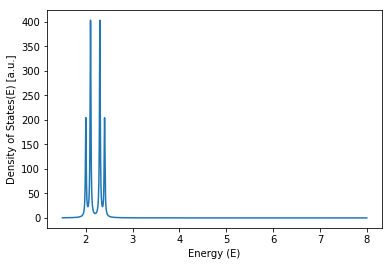

In [164]:
params = Parameters()
params.t_z = 1
params.t_phi = 0.1
params.N_z = 1
params.N_phi = 6
params.flux = 0

H = calc_H(params)
E_linspace = np.linspace(1.5,8,10000)
dos = np.array([calc_DOS(E,H) for E in E_linspace])

plt.plot(E_linspace,dos)
plt.xlabel('Energy (E)')
plt.ylabel('Density of States(E) [a.u.]')

I now want to introduce a magnetic field in the simulation. I think one way to do it is to add a phase to t_phi parameter.

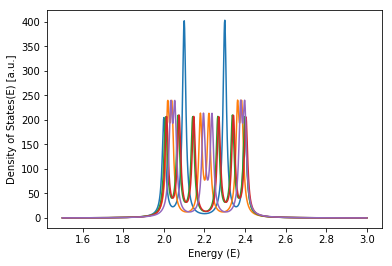

In [174]:
for i in range(5):
    params = Parameters()
    params.N_z = 1
    params.N_phi = 6
    params.flux = i/10
    params.t_z = 1
    params.t_phi = 0.1*np.exp(1j*2*np.pi*params.flux)

    H = calc_H(params)
    E_linspace = np.linspace(1.5,3,1000)
    dos = np.array([calc_DOS(E,H) for E in E_linspace])

    #plt.figure(i)
    plt.plot(E_linspace,dos)
    plt.xlabel('Energy (E)')
    plt.ylabel('Density of States(E) [a.u.]')
    #plt.title("flux" + str(params.flux))

In [ ]:
# code for transport

def calc_current(E,params)

    # calcualtion of the surface functions
    def surface_g(E,parmas):
        dummy_contact_params = Parameters()
        dummy_contact_params.N_z = 2
        dummy_contact_params.N_phi = params.N_phi
        dummy_contact_params.flux = params.flux
        dummy_contact_params.t_z = params.t_z
        dummy_contact_params.t_phi = params.t_phi
        alpha = 
        
                alpha = H_mat[:N_dof_lat,:N_dof_lat]
        beta = H_mat[:N_dof_lat,N_dof_lat:2*N_dof_lat]

        err = 1.0
        iter_count = 0
        iter_limit = 100000
        err_limit = 1e-6

        g = np.linalg.inv((E + 1j*eta)*np.eye(alpha.shape[0]) - alpha)
        g_old = np.linalg.inv((E + 1j*eta)*np.eye(alpha.shape[0]) - alpha)
        # iterate over iter_limit iterations or until err < err_limit
        for i in range(iter_limit):
            g = np.linalg.inv((E + 1j*eta)*np.eye(alpha.shape[0]) - alpha - np.dot(np.dot(np.conj(beta.T),g),beta))
            g = 0.5*(g + g_old)

            err = np.linalg.norm(g-g_old)/np.sqrt(np.linalg.norm(g)*np.linalg.norm(g_old))
            g_old = g
            if(err < err_limit):
                #print("Finished at",i,"Error :",err)
                break;
            if(i == (iter_limit - 1)):
                print("iter_limit hit in calculation of surface_g",err)
        return g
        
    # device Hamiltonian